**Deadline** до 1 июня 2021 23:59

## Часть 1
1. Обучить сеть DeepFM на бинарную задачу классифкации на датасете "adult".
2. Обучающая и валидационная выборки лежат в папке data в week08 и сам проект в папке DeepFM.
3. Перед обучением сети првоести анализ и предобработку данных.
4. Выложить код и показать точность и графики обучения.

In [55]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pickle

In [2]:
path_to_data = os.path.join(os.path.abspath(os.path.join(".", os.pardir)), "data/adult.csv")
df_original = pd.read_csv(path_to_data)
df_original.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [3]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   32074 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32049 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [4]:
category_number_dict = {}
column_to_drop = []

In [5]:
df = df_original.copy()

### Age category

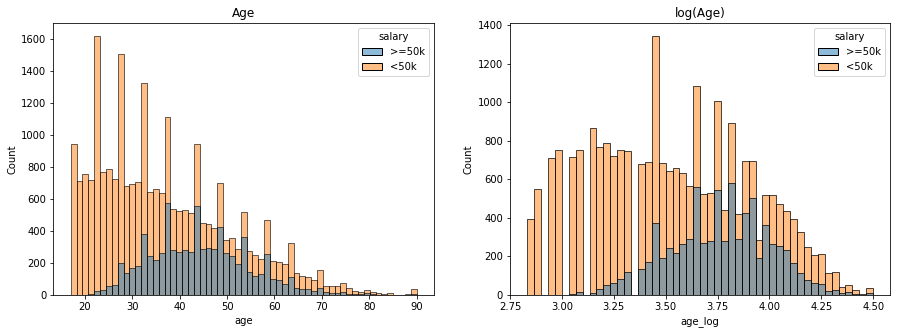

In [6]:
df['age_log'] = np.log(df.age)
fig, ax = plt.subplots(1,2, figsize=(15, 5))
sns.histplot(data=df, x='age', hue='salary', ax=ax[0]).set_title('Age')
sns.histplot(data=df, x='age_log', hue='salary', ax=ax[1]).set_title('log(Age)')

column_to_drop.append('age')

### Workclass category

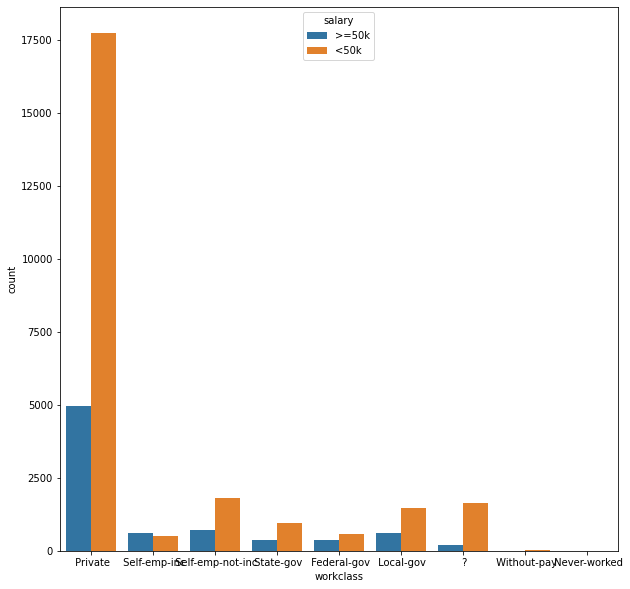

In [7]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
sns.countplot(data=df, x='workclass', hue='salary', ax=ax);

In [8]:
df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [9]:
df.loc[(df.workclass==' Never-worked') | (df.workclass==' Without-pay'), 'workclass'] = 'Without_salary'
workclass_encoder = LabelEncoder()
df.workclass = workclass_encoder.fit_transform(df.workclass)
category_number_dict['workclass'] = len(workclass_encoder.classes_)

### Fnlwgt category

<AxesSubplot:xlabel='fnlwgt_log', ylabel='Count'>

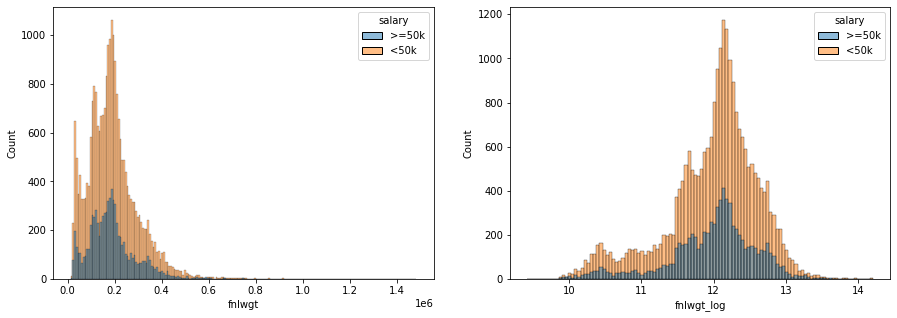

In [10]:
df['fnlwgt_log'] = np.log(df.fnlwgt)
fig, ax = plt.subplots(1,2, figsize=(15, 5))
sns.histplot(data=df, x='fnlwgt', hue='salary', ax=ax[0])
sns.histplot(data=df, x='fnlwgt_log', hue='salary', ax=ax[1])

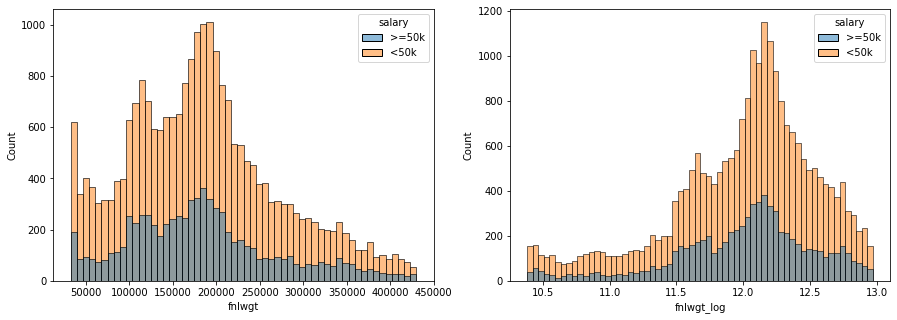

In [11]:
df = df[(df.fnlwgt<=np.percentile(df.fnlwgt, q=97.5)) & (df.fnlwgt>=np.percentile(df.fnlwgt, q=2.5))]

fig, ax = plt.subplots(1,2, figsize=(15, 5))
sns.histplot(data=df, x='fnlwgt', hue='salary', ax=ax[0])
sns.histplot(data=df, x='fnlwgt_log', hue='salary', ax=ax[1])

column_to_drop.append('fnlwgt')

### Education category

<AxesSubplot:xlabel='education', ylabel='count'>

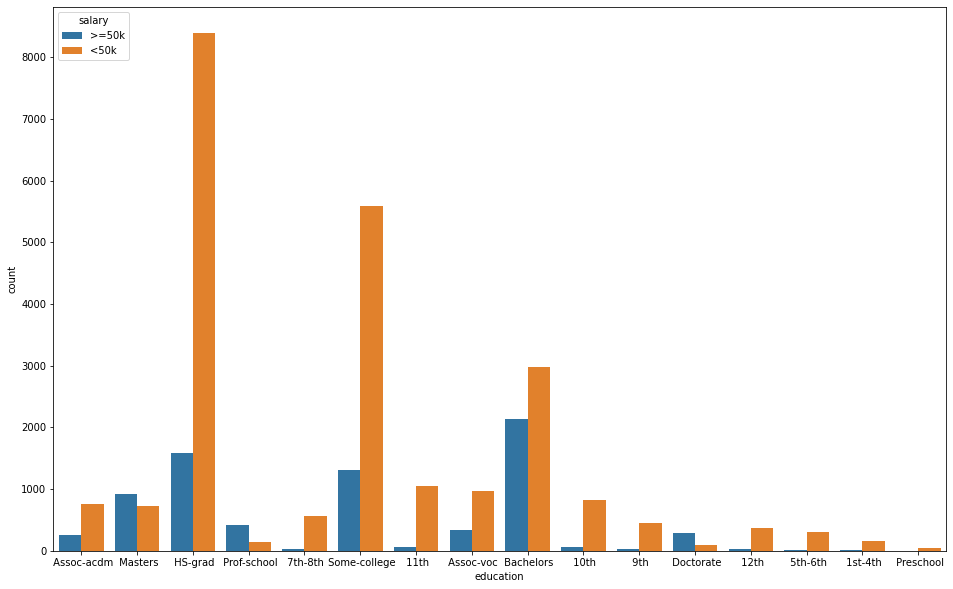

In [12]:
fig, ax = plt.subplots(1,1,figsize=(16,10))
sns.countplot(data=df, x='education', hue='salary', ax=ax)

In [13]:
df.loc[(df.education==' Prof-school') |
   (df.education==' Doctorate'), 'education'] = 'DSc'

df.loc[
    (df.education==' 7th-8th') |
    (df.education==' 11th') |
    (df.education==' 10th') |
    (df.education==' 9th') |
    (df.education==' 12th') |
    (df.education==' 5th-6th') |
    (df.education==' 1st-4th') |
    (df.education==' Preschool'), 'education'] = 'school'

<AxesSubplot:xlabel='education', ylabel='count'>

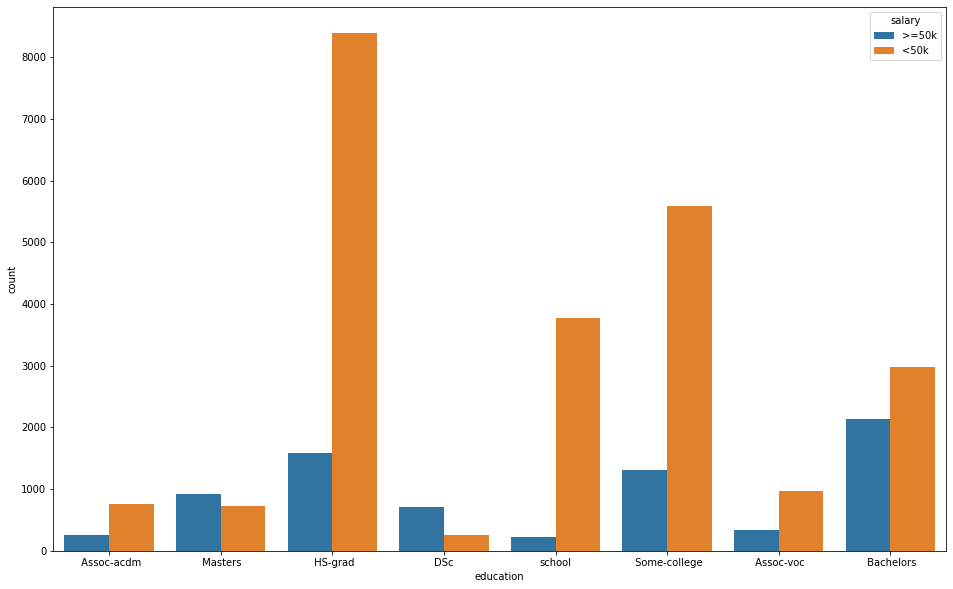

In [14]:
fig, ax = plt.subplots(1,1,figsize=(16,10))
sns.countplot(data=df, x='education', hue='salary', ax=ax)

In [15]:
education_encoder = LabelEncoder()
df.education = education_encoder.fit_transform(df.education)
category_number_dict['education'] = len(education_encoder.classes_)

### Education-num category

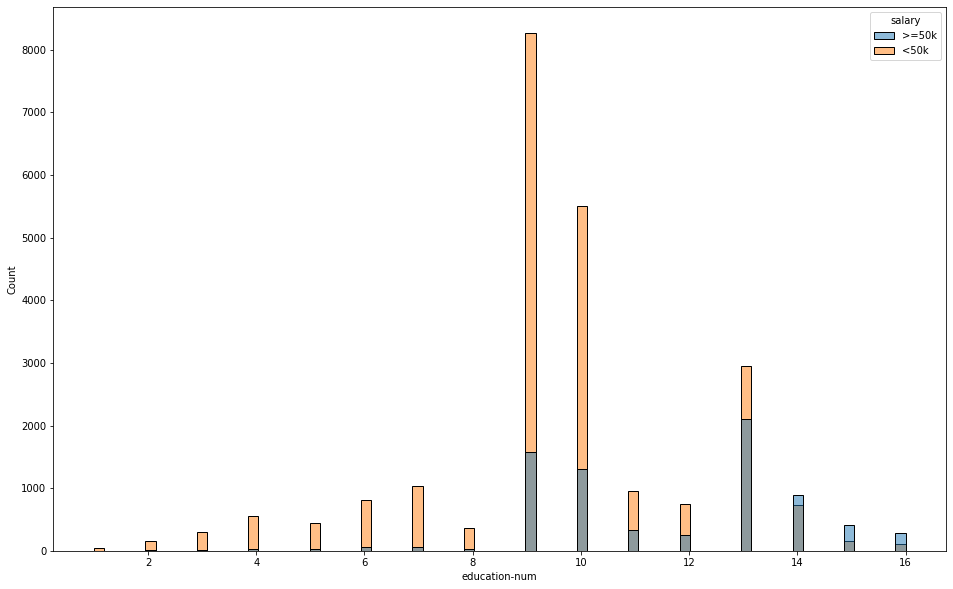

In [16]:
fig, ax = plt.subplots(1,1,figsize=(16,10))
sns.histplot(data=df, x='education-num', hue='salary');

In [17]:
df['education-num'].fillna(df['education-num'].median(), inplace=True)

In [18]:
df[df['education-num']<8.0].salary.value_counts()

<50k     3343
>=50k     195
Name: salary, dtype: int64

### Marital-status category

<AxesSubplot:xlabel='marital-status', ylabel='count'>

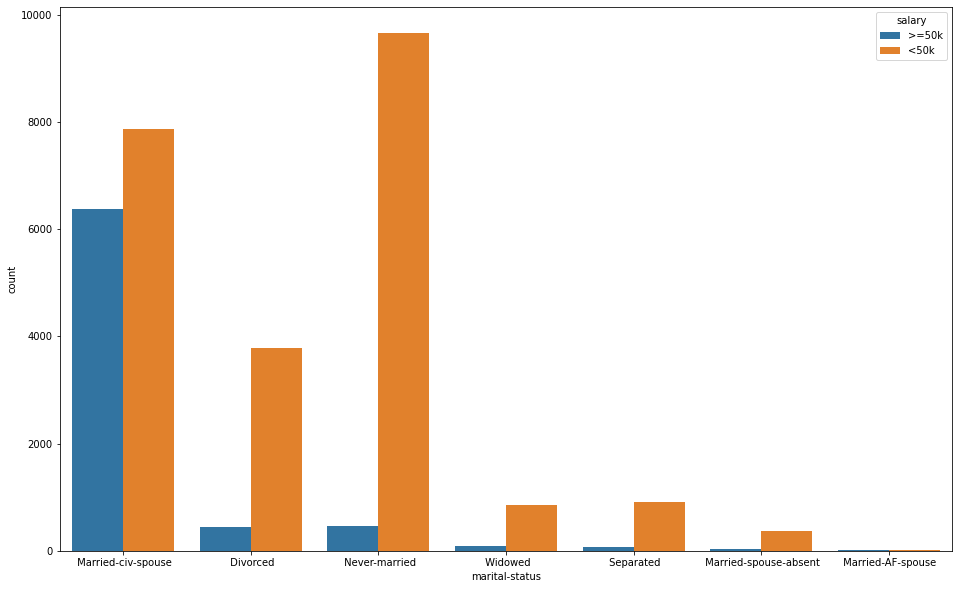

In [19]:
fig, ax = plt.subplots(1,1,figsize=(16,10))
sns.countplot(data=df, x='marital-status', hue='salary', ax=ax)

In [20]:
df.loc[
    (df['marital-status']==' Widowed') |
    (df['marital-status']==' Separated') |
    (df['marital-status']==' Married-spouse-absent') |
    (df['marital-status']==' Married-AF-spouse'), 'marital-status'] = 'problematic'

<AxesSubplot:xlabel='marital-status', ylabel='count'>

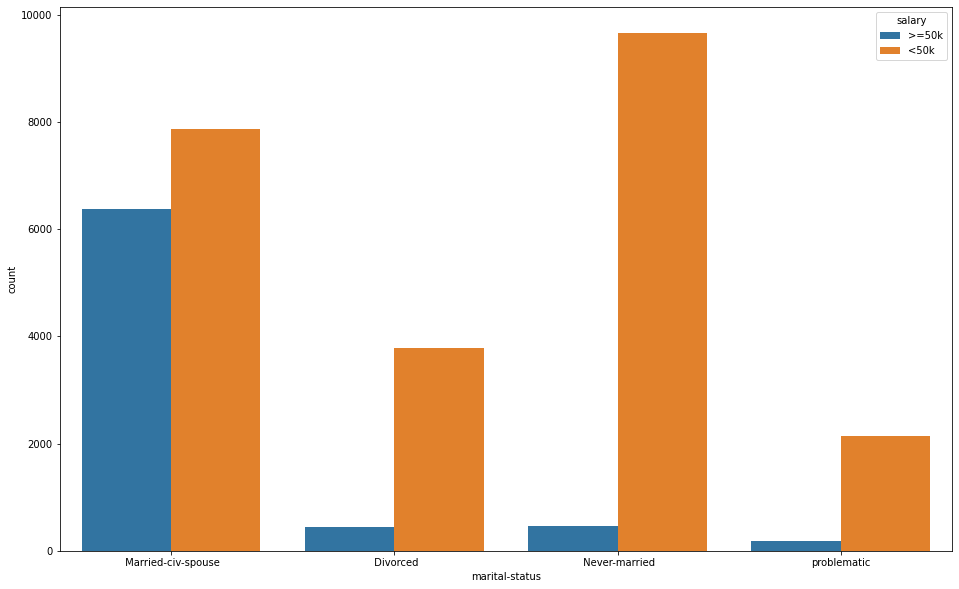

In [21]:
fig, ax = plt.subplots(1,1,figsize=(16,10))
sns.countplot(data=df, x='marital-status', hue='salary', ax=ax)

In [22]:
martial_status_encoder = LabelEncoder()
df['marital-status'] = martial_status_encoder.fit_transform(df['marital-status'])
category_number_dict['marital-status'] = len(martial_status_encoder.classes_)

### Occupation category

In [23]:
df.occupation = df.occupation.fillna(' ?')

<AxesSubplot:xlabel='occupation', ylabel='count'>

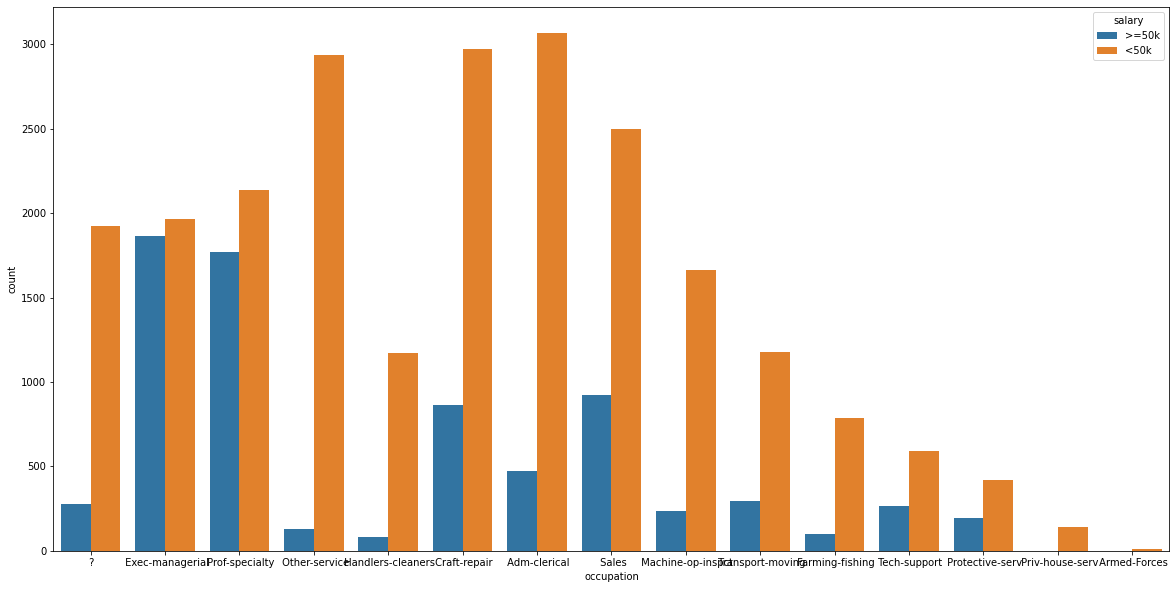

In [24]:
fig, ax = plt.subplots(1,1,figsize=(20,10))
sns.countplot(data=df, x='occupation', hue='salary', ax=ax)

In [25]:
df.occupation.unique()

array([' ?', ' Exec-managerial', ' Prof-specialty', ' Other-service',
       ' Handlers-cleaners', ' Craft-repair', ' Adm-clerical', ' Sales',
       ' Machine-op-inspct', ' Transport-moving', ' Farming-fishing',
       ' Tech-support', ' Protective-serv', ' Priv-house-serv',
       ' Armed-Forces'], dtype=object)

In [26]:
df.loc[
    (df['occupation']==' Armed-Forces') |
    (df['occupation']==' Priv-house-serv'), 'occupation'] = 'union'

In [27]:
occupation_encoder = LabelEncoder()
df['occupation'] = occupation_encoder.fit_transform(df['occupation'])
category_number_dict['occupation'] = len(occupation_encoder.classes_)

### Relationship category

In [28]:
df.relationship.value_counts()

 Husband           12554
 Not-in-family      7866
 Own-child          4840
 Unmarried          3255
 Wife               1494
 Other-relative      924
Name: relationship, dtype: int64

<AxesSubplot:xlabel='relationship', ylabel='count'>

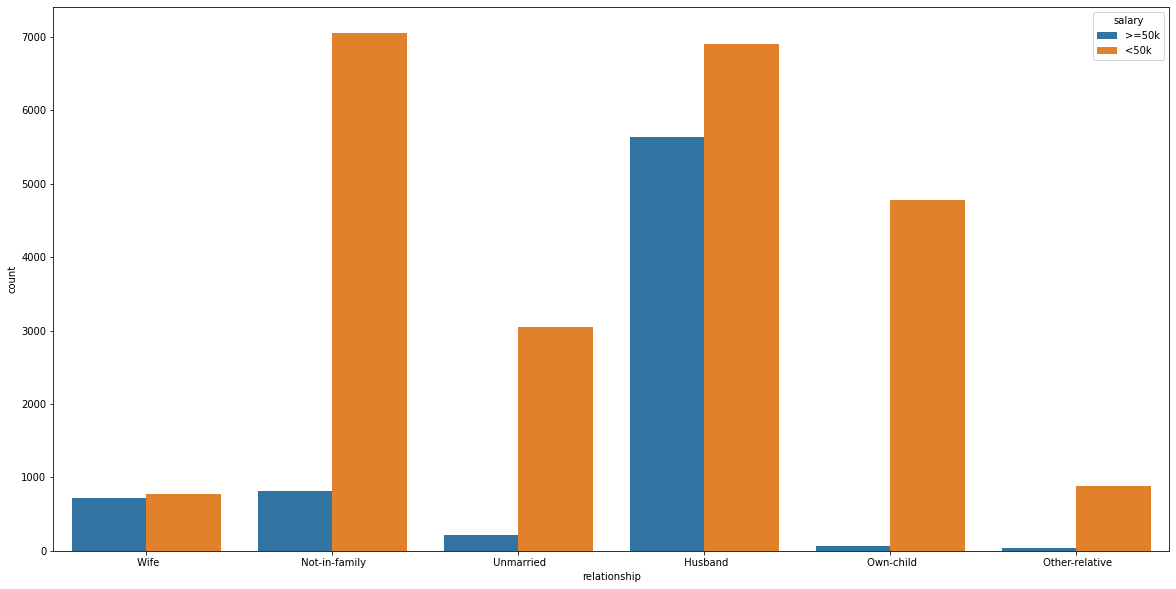

In [29]:
fig, ax = plt.subplots(1,1,figsize=(20,10))
sns.countplot(data=df, x='relationship', hue='salary', ax=ax)

In [30]:
relationship_encoder = LabelEncoder()
df['relationship'] = relationship_encoder.fit_transform(df['relationship'])
category_number_dict['relationship'] = len(relationship_encoder.classes_)

### Race category

<AxesSubplot:xlabel='race', ylabel='count'>

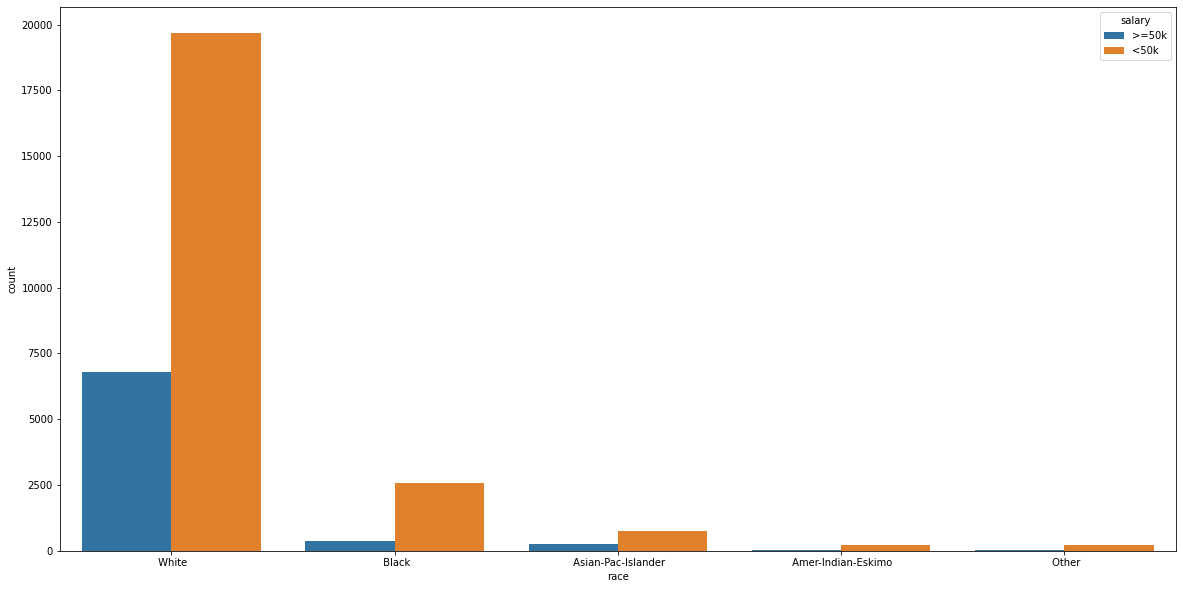

In [31]:
fig, ax = plt.subplots(1,1,figsize=(20,10))
sns.countplot(data=df, x='race', hue='salary', ax=ax)

In [32]:
df.race.unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

<AxesSubplot:xlabel='race', ylabel='count'>

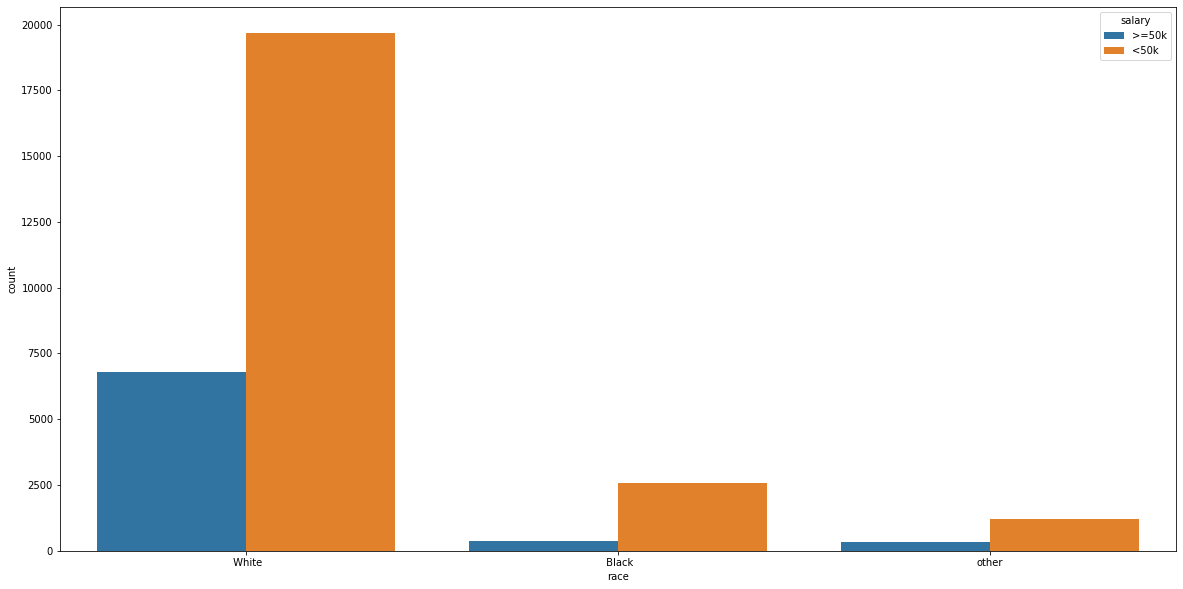

In [33]:
df.loc[ 
    (df.race==' Asian-Pac-Islander') |
    (df.race==' Amer-Indian-Eskimo') |
    (df.race==' Other'), 'race'] = 'other'

fig, ax = plt.subplots(1,1,figsize=(20,10))
sns.countplot(data=df, x='race', hue='salary', ax=ax)

In [34]:
race_encoder = LabelEncoder()
df['race'] = race_encoder.fit_transform(df['race'])
category_number_dict['race'] = len(race_encoder.classes_)

### Sex category

In [35]:
sex_encoder = LabelEncoder()
df['sex'] = sex_encoder.fit_transform(df['sex'])
category_number_dict['sex'] = len(sex_encoder.classes_)

### Capital gain category

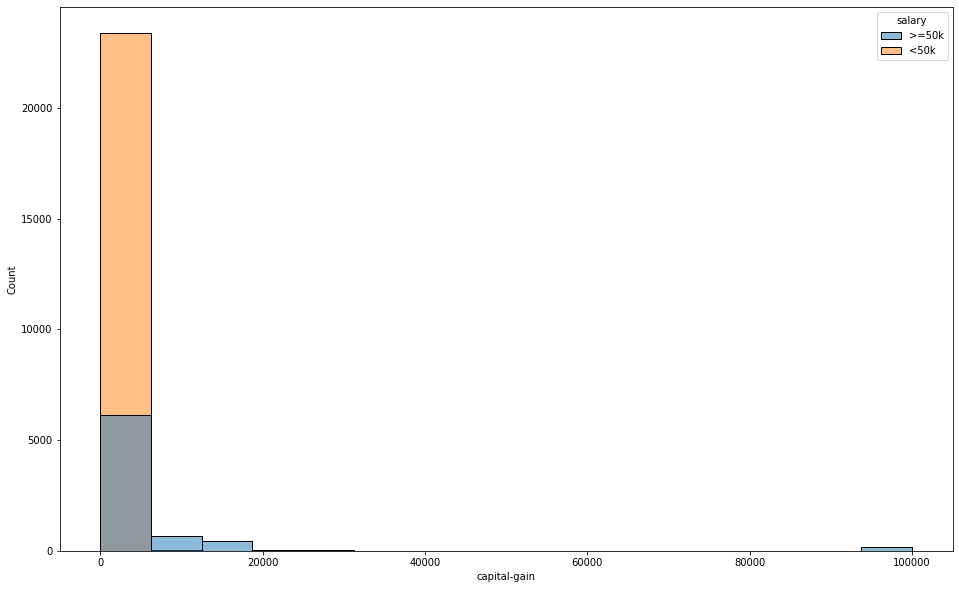

In [36]:
fig, ax = plt.subplots(1,1,figsize=(16,10))
sns.histplot(data=df, x='capital-gain', hue='salary');

### Capital loss

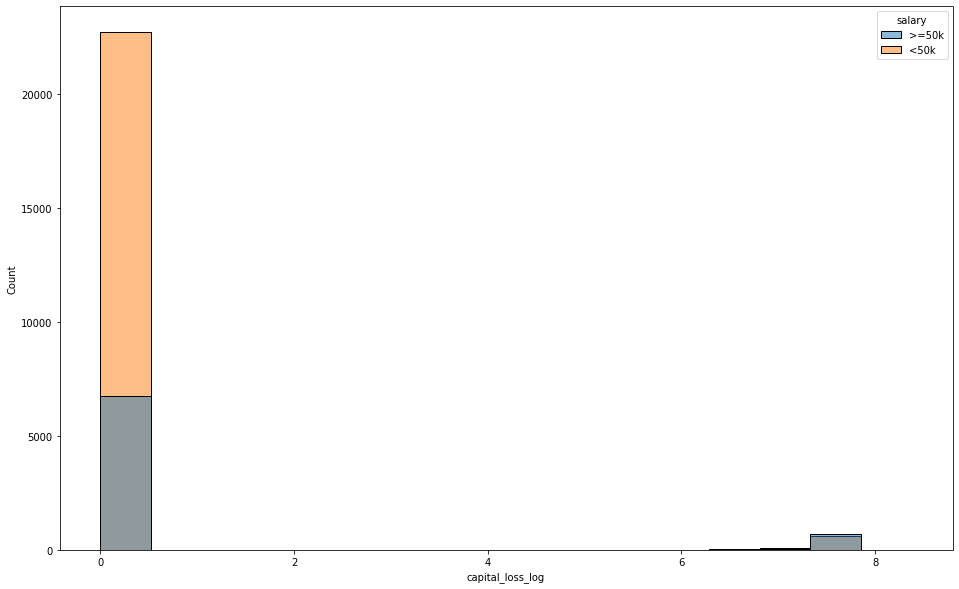

In [37]:
df['capital_loss_log'] = np.log(df['capital-loss']+1)
fig, ax = plt.subplots(1,1,figsize=(16,10))
sns.histplot(data=df, x='capital_loss_log', hue='salary');
column_to_drop.append('capital-loss')

### Hours-per-week

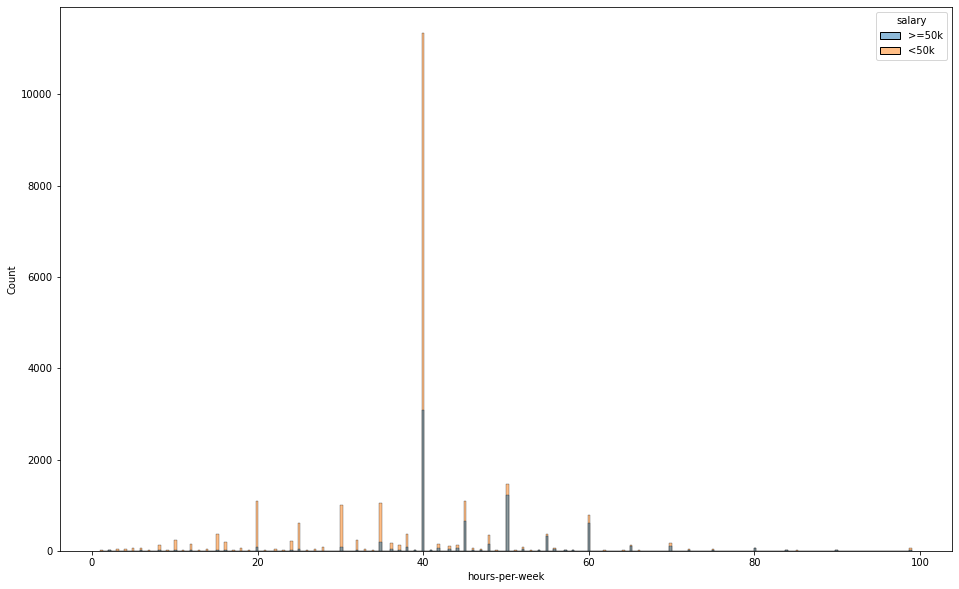

In [38]:
df['hours-per-week']
fig, ax = plt.subplots(1,1,figsize=(16,10))
sns.histplot(data=df, x='hours-per-week', hue='salary');

In [39]:
df['hours_per_week_bins'] = pd.cut(df['hours-per-week'], bins=7, labels=np.arange(7))

<AxesSubplot:xlabel='hours_per_week_bins', ylabel='count'>

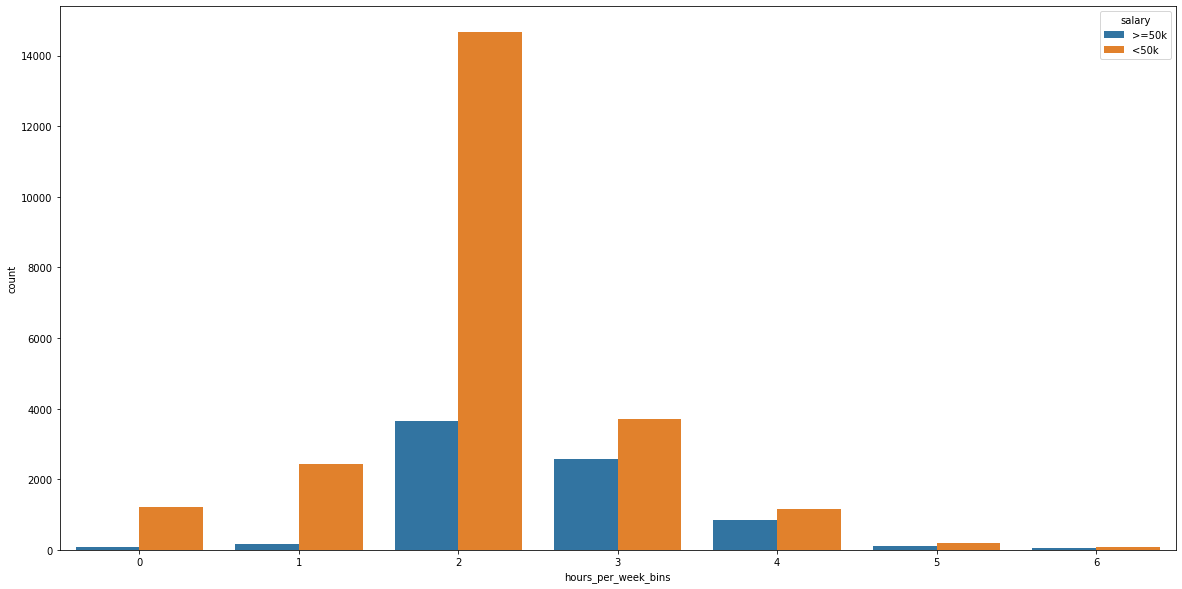

In [40]:
fig, ax = plt.subplots(1,1,figsize=(20,10))
sns.countplot(data=df, x='hours_per_week_bins', hue='salary', ax=ax)

In [41]:
column_to_drop.append('hours-per-week')
category_number_dict['hours_per_week_bins'] = len(df['hours_per_week_bins'].unique())

### Native country category

In [42]:
df['native-country'].unique()

array([' United-States', ' ?', ' Puerto-Rico', ' Mexico', ' Canada',
       ' Taiwan', ' Vietnam', ' Philippines', ' Germany', ' India',
       ' China', ' England', ' Japan', ' Trinadad&Tobago', ' Iran',
       ' Jamaica', ' Italy', ' Greece', ' Cuba', ' South',
       ' Dominican-Republic', ' Poland', ' Hong', ' Nicaragua',
       ' Thailand', ' Portugal', ' Peru', ' El-Salvador', ' Ecuador',
       ' Ireland', ' France', ' Guatemala', ' Yugoslavia', ' Hungary',
       ' Scotland', ' Haiti', ' Honduras', ' Columbia', ' Laos',
       ' Outlying-US(Guam-USVI-etc)', ' Cambodia'], dtype=object)

In [43]:
df['native-country'].value_counts()

 United-States                 27725
 Mexico                          568
 ?                               562
 Philippines                     186
 Germany                         131
 Canada                          116
 Puerto-Rico                     112
 India                            98
 Cuba                             94
 El-Salvador                      94
 England                          84
 Jamaica                          81
 South                            78
 China                            75
 Italy                            72
 Dominican-Republic               70
 Vietnam                          67
 Poland                           60
 Japan                            57
 Columbia                         57
 Guatemala                        53
 Taiwan                           49
 Haiti                            44
 Iran                             42
 Portugal                         37
 Nicaragua                        30
 Greece                           29
 

In [44]:
df['native_country'] = df['native-country'].copy()

df.loc[
    (df['native_country']!=' United-States') &
    (df['native_country'] != ' Mexico'), 'native_country'] = 'other'

column_to_drop.append('native-country')

<AxesSubplot:xlabel='native_country', ylabel='count'>

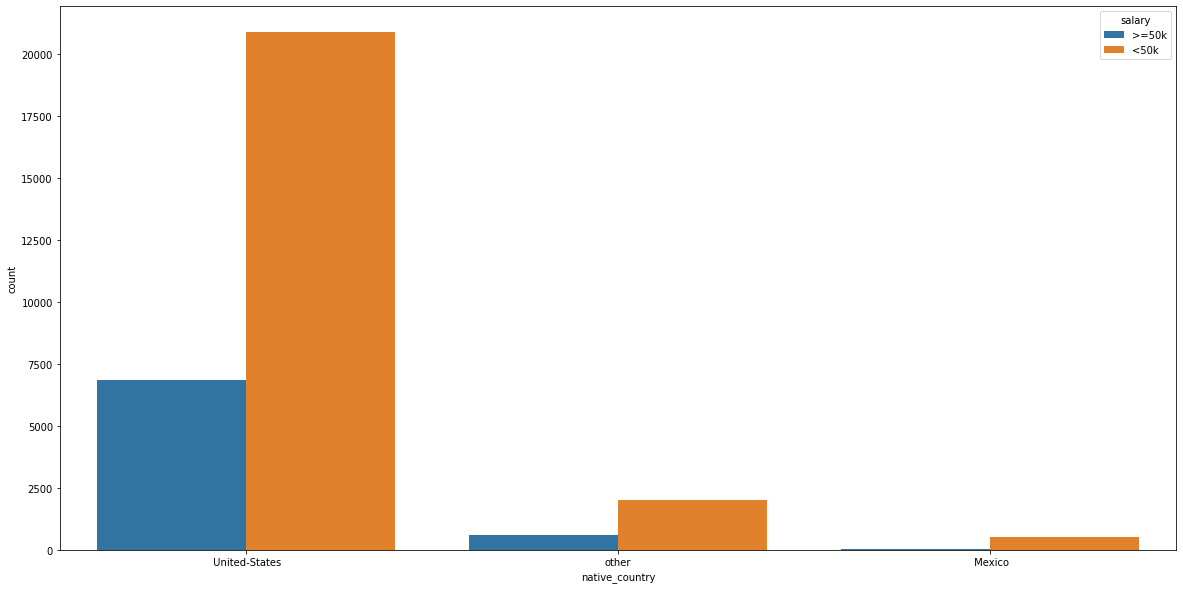

In [45]:
fig, ax = plt.subplots(1,1,figsize=(20,10))
sns.countplot(data=df, x='native_country', hue='salary', ax=ax)

In [46]:
country_encoder = LabelEncoder()
df['native_country'] = country_encoder.fit_transform(df['native_country'])
category_number_dict['native_country'] = len(country_encoder.classes_)

### Create datasets

In [47]:
target_encoder = LabelEncoder()
df.salary = target_encoder.fit_transform(df.salary)

In [48]:
df = df.drop(column_to_drop, axis=1)

In [67]:
numerical_columns = list(set(df.drop('salary', axis=1).columns).difference(set(category_number_dict.keys())))
categorical_colums = [*category_number_dict.keys()]

### Save files

In [68]:
df.to_csv(os.path.join(os.path.abspath(os.path.join(".", os.pardir)),'data/encoded_dataset.csv'))

In [69]:
with open(os.path.join(os.path.abspath(os.path.join(".", os.pardir)),'data/auxiliary_dicts.pkl'), 'wb') as file:
    pickle.dump([category_number_dict, numerical_columns, categorical_colums], file)

In [70]:
category_number_dict

{'workclass': 8,
 'education': 8,
 'marital-status': 4,
 'occupation': 14,
 'relationship': 6,
 'race': 3,
 'sex': 2,
 'hours_per_week_bins': 7,
 'native_country': 3}

In [71]:
numerical_columns, categorical_colums

(['age_log',
  'fnlwgt_log',
  'education-num',
  'capital_loss_log',
  'capital-gain'],
 ['workclass',
  'education',
  'marital-status',
  'occupation',
  'relationship',
  'race',
  'sex',
  'hours_per_week_bins',
  'native_country'])